In [1]:
import numpy as np
import matplotlib.pyplot as plt

from LIMxCMBL.kernels import *

In [2]:
_chis = np.linspace(0, chimax_sample, 10**6)
dchi = np.mean(np.diff(_chis))

In [3]:
_tmp_ks = np.logspace(-10, 3, 10000)
_tmp_Pk = np.zeros_like(_tmp_ks)

for k_idx, k in enumerate(_tmp_ks):
    _tmp_Pk[k_idx] = ccl.linear_matter_power(cosmo, k, 1)

In [4]:
ks = 2*np.pi*np.fft.rfftfreq(len(_chis), d=dchi)

f_P1Dk = lambda k: np.pi/k * k**3/(2*np.pi**2) * np.interp(np.log(k), np.log(_tmp_ks), _tmp_Pk, left=0, right=0) #units Mpc
P1Dk = f_P1Dk(ks)
P1Dk[0] = 0 #fix NaN

/tmp/ipykernel_203369/2296171058.py:3: RuntimeWarning: divide by zero encountered in divide
  f_P1Dk = lambda k: np.pi/k * k**3/(2*np.pi**2) * np.interp(np.log(k), np.log(_tmp_ks), _tmp_Pk, left=0, right=0) #units Mpc
/tmp/ipykernel_203369/2296171058.py:3: RuntimeWarning: invalid value encountered in multiply
  f_P1Dk = lambda k: np.pi/k * k**3/(2*np.pi**2) * np.interp(np.log(k), np.log(_tmp_ks), _tmp_Pk, left=0, right=0) #units Mpc
/tmp/ipykernel_203369/2296171058.py:3: RuntimeWarning: divide by zero encountered in log
  f_P1Dk = lambda k: np.pi/k * k**3/(2*np.pi**2) * np.interp(np.log(k), np.log(_tmp_ks), _tmp_Pk, left=0, right=0) #units Mpc


In [19]:
n_k_bins = 100
k_bin_edges = np.linspace(min(ks), max(ks), n_k_bins+1)
k_bin_centers = (k_bin_edges[1:]+k_bin_edges[:-1])/2

In [20]:
n_x_bins = 100
x_bin_edges = np.linspace(min(_chis), max(_chis), n_x_bins+1)
x_bin_centers = (x_bin_edges[1:]+x_bin_edges[:-1])/2

In [21]:
white_x = np.random.normal(loc=0., scale=1./np.sqrt(dchi), size=len(_chis))
white_k = np.fft.rfft(white_x) * dchi

In [22]:
def measure_power(field):
    power = field * np.conj(field)
    binned_power = np.zeros(n_k_bins)
    for bin_idx in range(n_k_bins):
        l, r = k_bin_edges[bin_idx], k_bin_edges[bin_idx+1]
        idxs = np.where((ks >= l) & (ks < r))
        binned_power[bin_idx] = np.mean(power[idxs])        
    binned_power/=chimax_sample
    return binned_power

/tmp/ipykernel_203369/816046387.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  binned_power[bin_idx] = np.mean(power[idxs])


(0.9, 1.1)

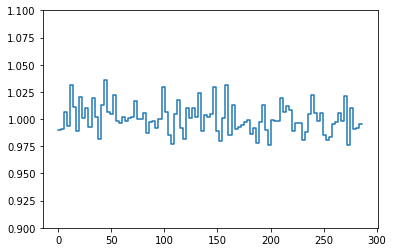

In [23]:
Phat_white = measure_power(white_k)
plt.step(k_bin_edges, np.append(Phat_white, [Phat_white[-1]], ), 
             where='post')
plt.ylim(0.9,1.1)

In [24]:
delta_m_k = np.sqrt(P1Dk) * white_k 
delta_m_x = np.fft.irfft(delta_m_k) / dchi

/tmp/ipykernel_203369/816046387.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  binned_power[bin_idx] = np.mean(power[idxs])


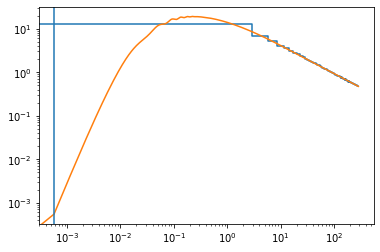

In [26]:
Phat_delta_m = measure_power(delta_m_k)
plt.step(k_bin_edges, np.append(Phat_delta_m, [Phat_delta_m[-1]], ), 
             where='post')
plt.plot(ks, P1Dk)
plt.yscale('log')
plt.xscale('log')
plt.axvline(2*np.pi/chimax_sample)

# toy numerical study of cross

In [30]:
kappa = np.sum(dchi * np.interp(x=_chis, xp=chis, fp=Wk * Dz) * delta_m_x)

In [60]:
I_x = np.interp(x=_chis, xp=chis, fp=KI) * delta_m_x
I_k = np.fft.rfft(I_x) * dchi
I_k_filtered = {}
for Lambda in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]:
    I_k_filtered[Lambda] = np.where((ks > Lambda), I_k, 0) 
I_x_filtered = {Lambda : np.fft.irfft(I_k_filtered[Lambda])/dchi for Lambda in I_k_filtered}

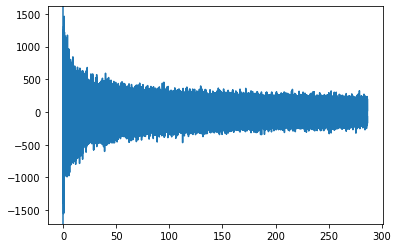

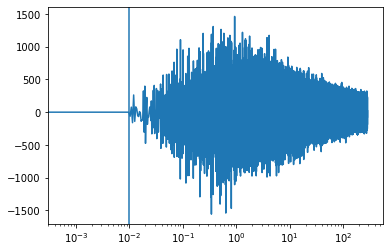

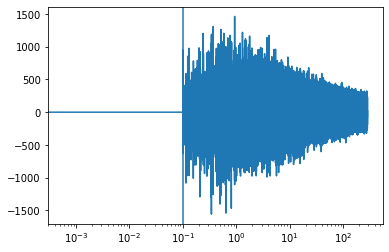

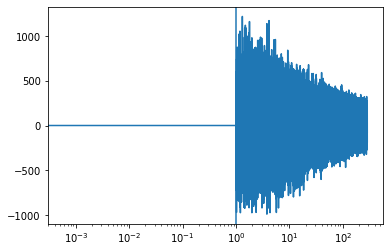

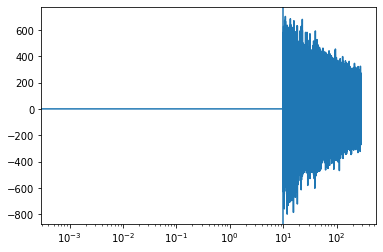

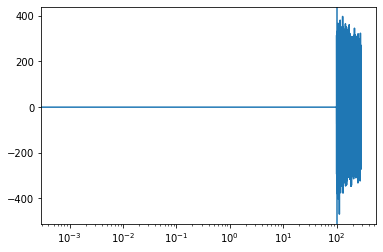

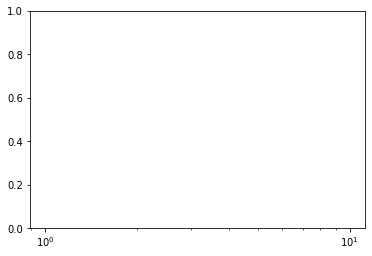

In [90]:
for Lambda in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]:
    plt.plot(ks, I_k_filtered[Lambda])
    plt.axvline(Lambda)
    plt.show()
    plt.xscale('log')

In [76]:
I_x_noLC = np.mean(KI) * delta_m_x
I_k_noLC = np.fft.rfft(I_x_noLC) * dchi
I_k_noLC_filtered = {}
for Lambda in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]:
    I_k_noLC_filtered[Lambda] = np.where((ks > Lambda), I_k_noLC, 0) 
I_x_noLC_filtered = {Lambda : np.fft.irfft(I_k_noLC_filtered[Lambda])/dchi for Lambda in I_k_filtered}